# Prepare Forecasting Model For Airlines Passengers data set

## Data Description:

- Month :	month of the year: 'jan' to 'dec'
- Passengers : no of passengers

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [30]:
al = pd.read_excel(r'C:\Users\ASUS\OneDrive\Documents\GitHub\Data-Science-Assignments\Assignment_18_Forecasting\Dataset\Airlines+Data.xlsx')
al.set_index('Month', inplace = True)

al

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [14]:
al.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [15]:
al.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [16]:
al.isna().sum()

Passengers    0
dtype: int64

In [17]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [18]:
uni(al)


 All Unique Value in Passengers
[104 112 114 115 118 119 121 125 126 129 132 133 135 136 140 141 145 146
 148 149 150 158 162 163 166 170 171 172 178 180 181 183 184 188 191 193
 194 196 199 201 203 204 209 211 218 227 229 230 233 234 235 236 237 242
 243 259 264 267 269 270 271 272 274 277 278 284 293 302 306 312 313 315
 317 318 347 355 364 374 405 413]
Total no of unique values 80


### Visualizing The Data

#### Ploting Line-Plot

<AxesSubplot:title={'center':'Original Data'}, xlabel='Month', ylabel='No Of Passengers'>

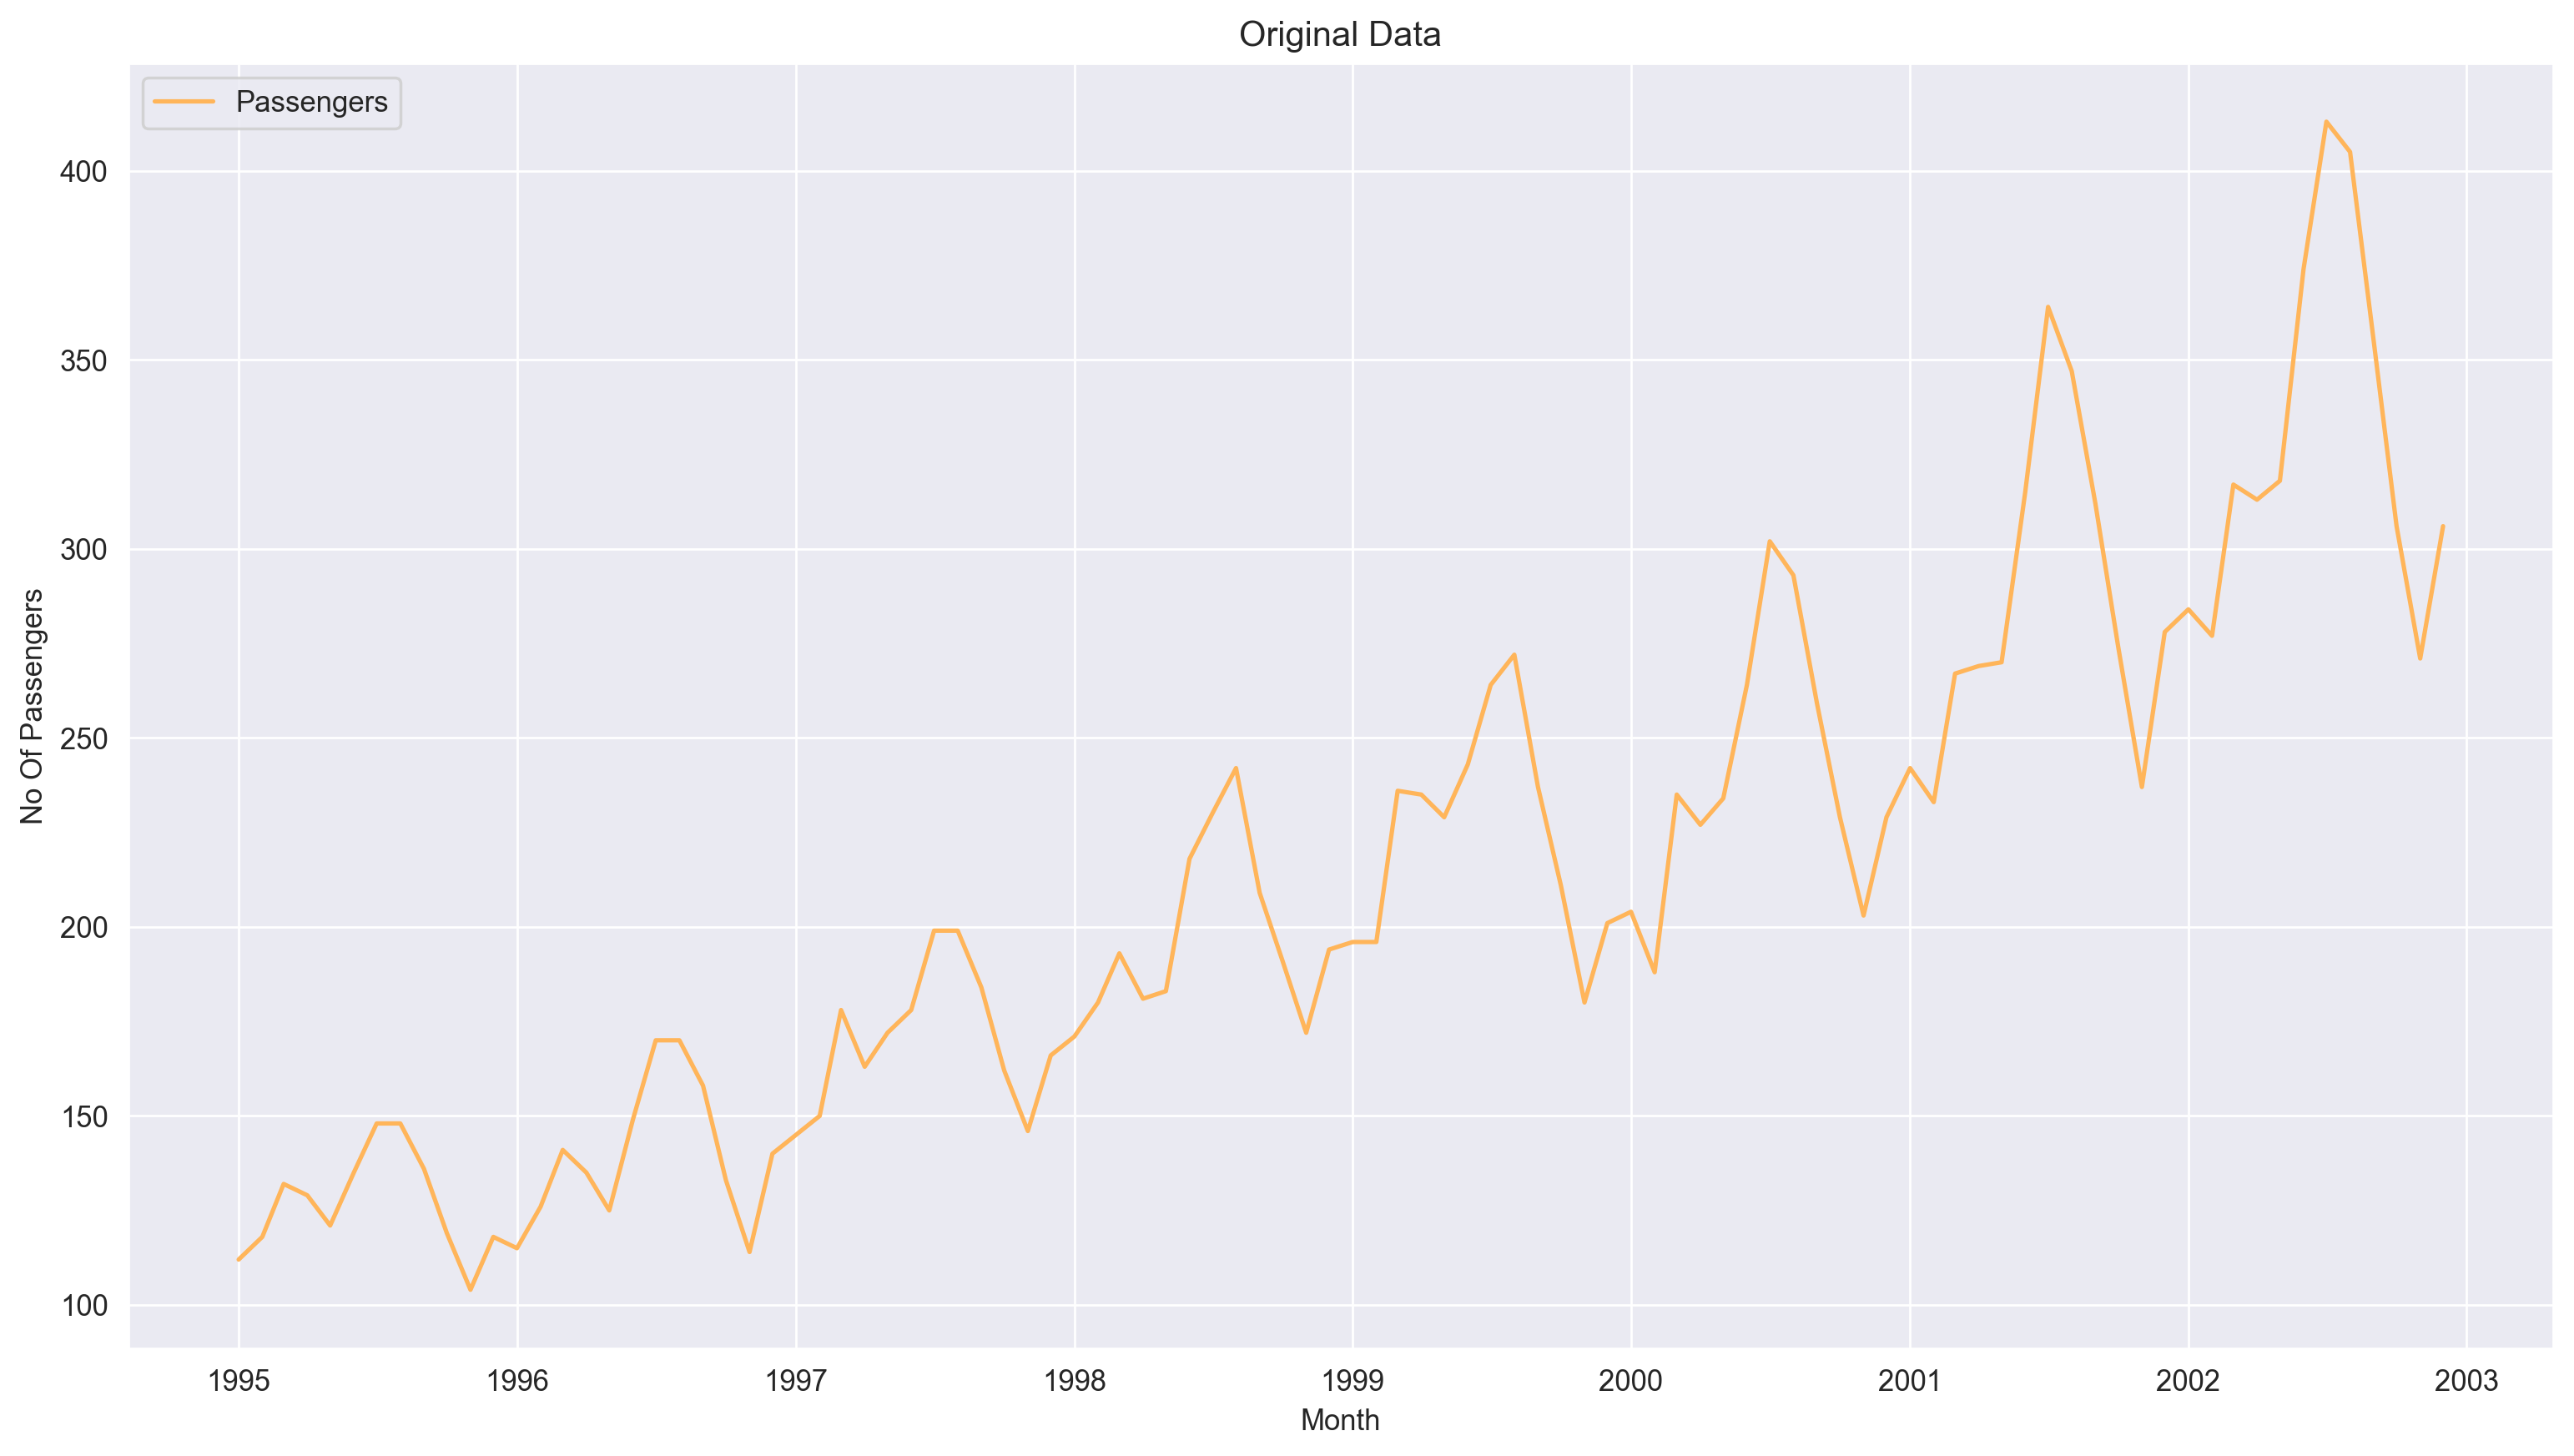

In [13]:
plt.title('Original Data')
plt.ylabel('No Of Passengers')
sns.lineplot(data = al, palette = ["#ffb55a"])

#### Ploting Distplot

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

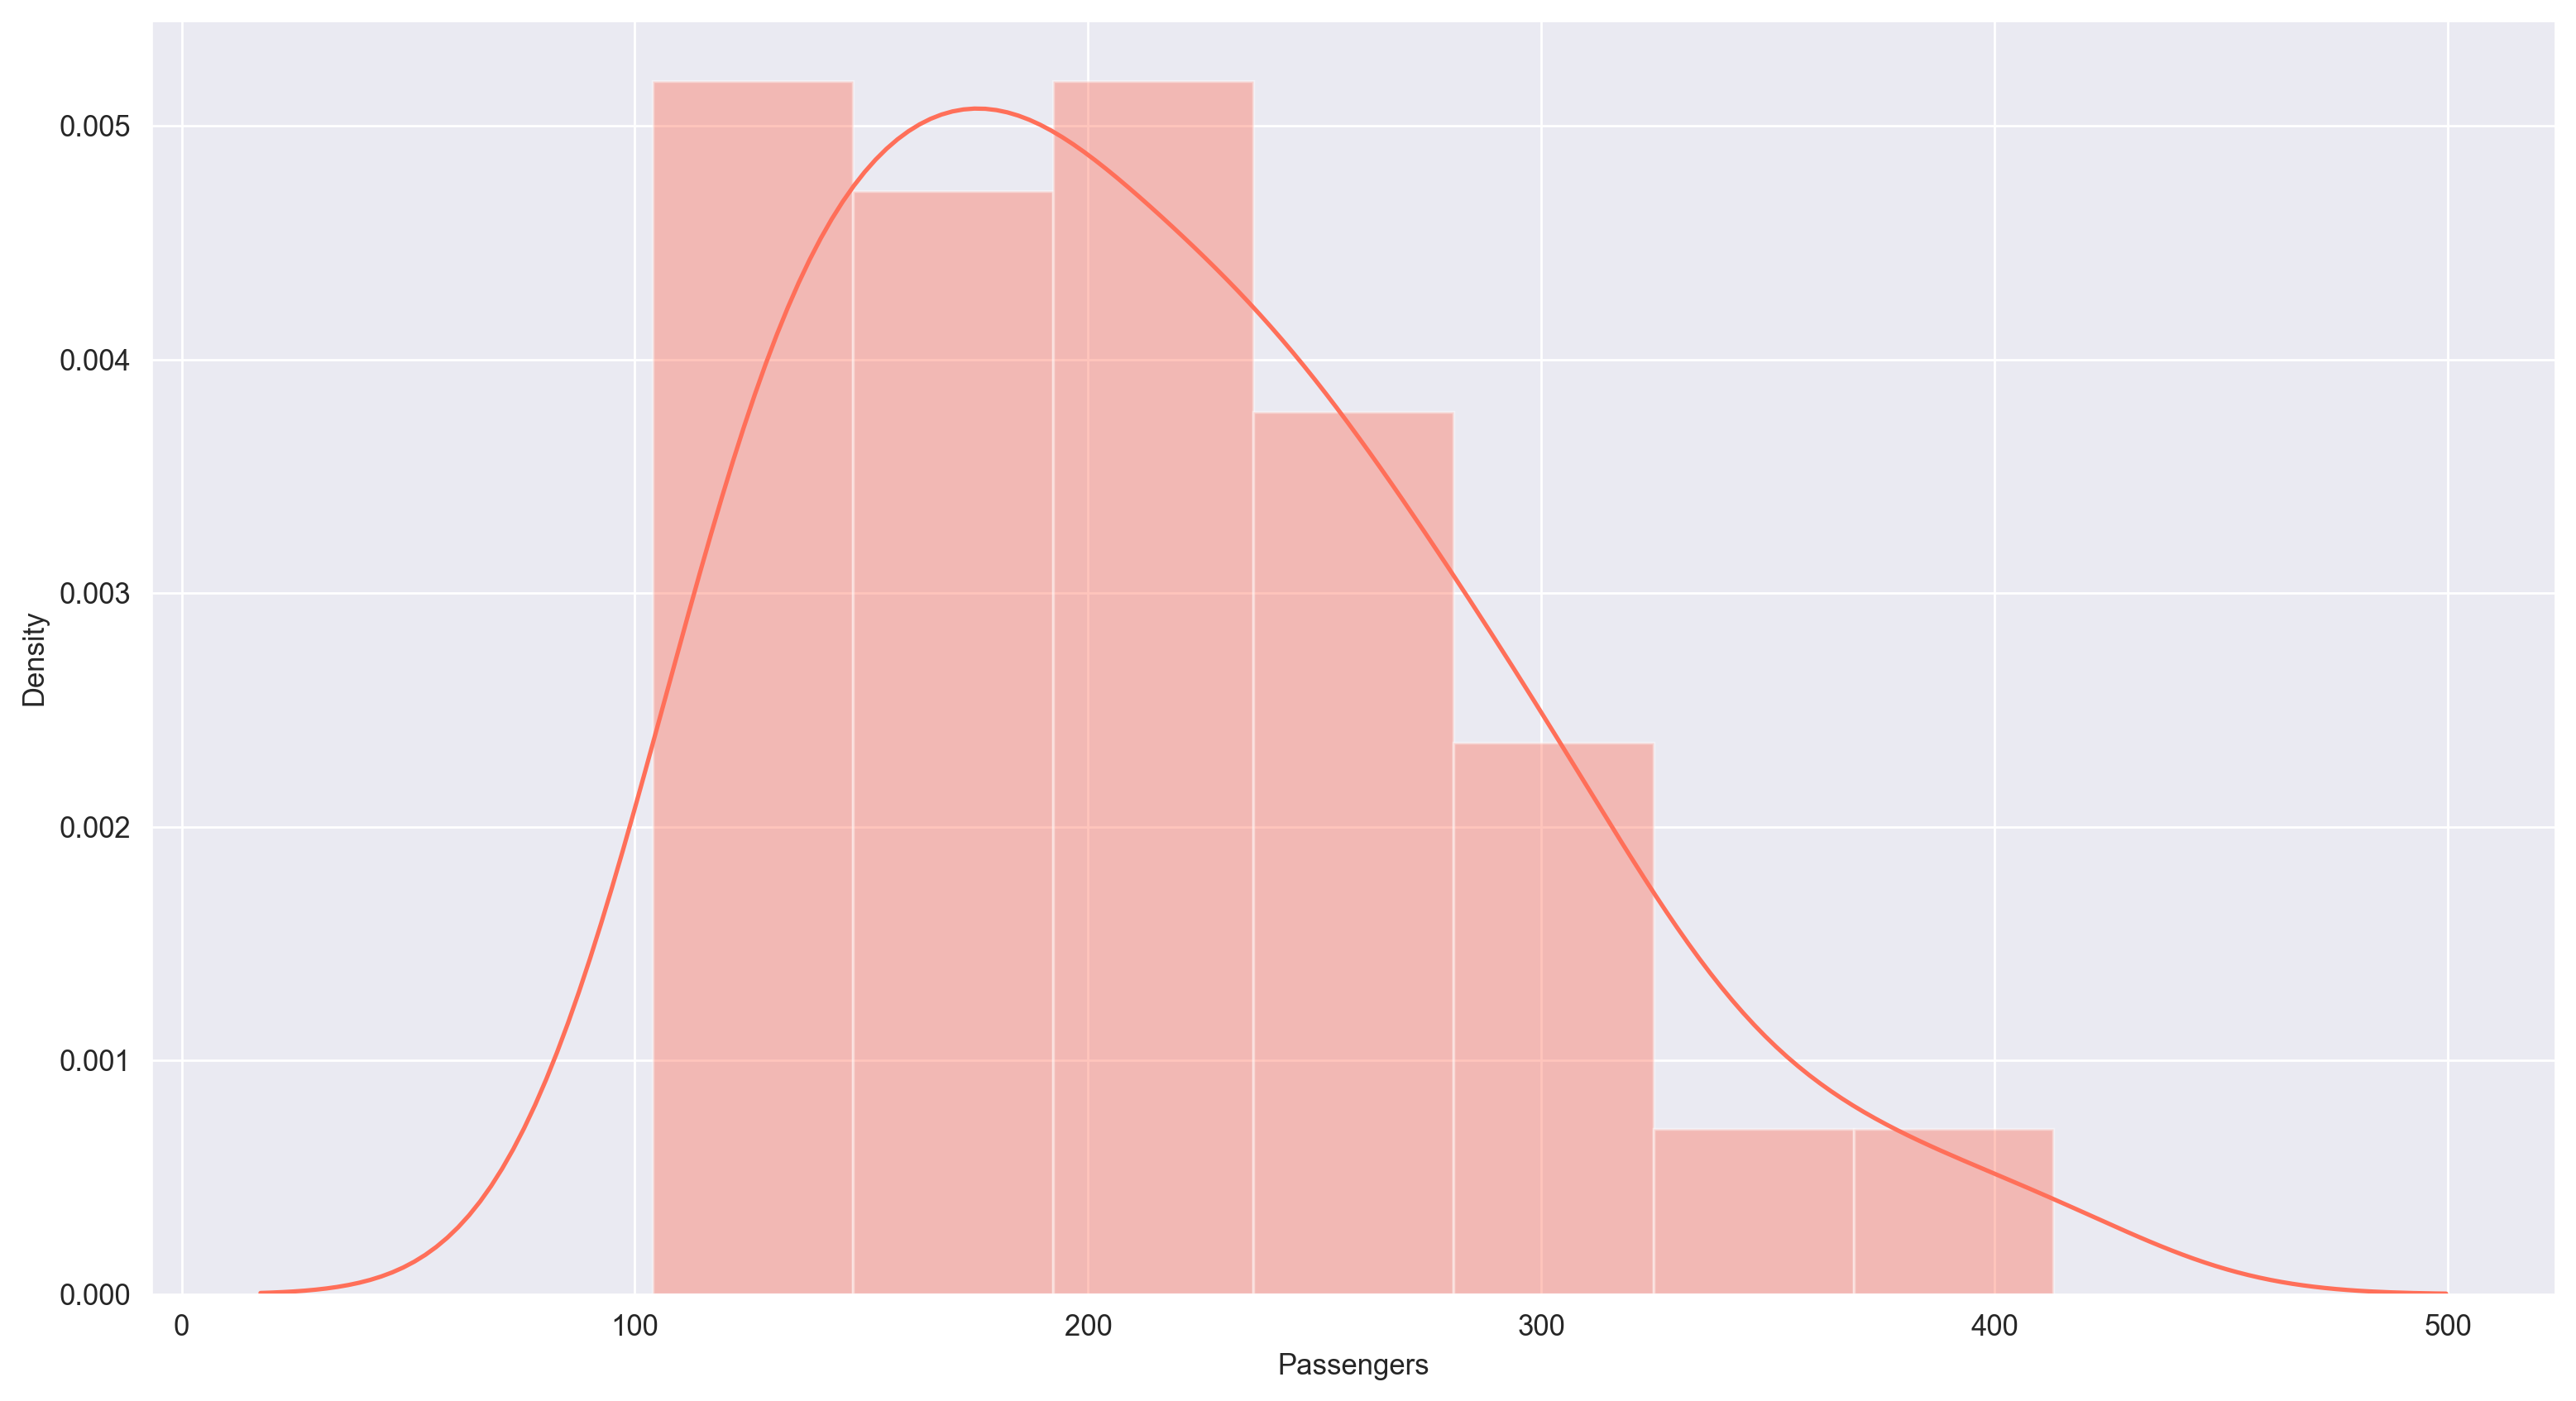

In [34]:
sns.distplot(al['Passengers'], color = '#ff6f59')

### Performing First-Order Difference

In [31]:
fo = al.copy()
fo['First-Order'] = fo['Passengers'].diff(periods = 1)
fo.dropna(inplace=True)

fo.head()

,Passengers,First-Order
Month,,
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
1995-06-01,135,14.0


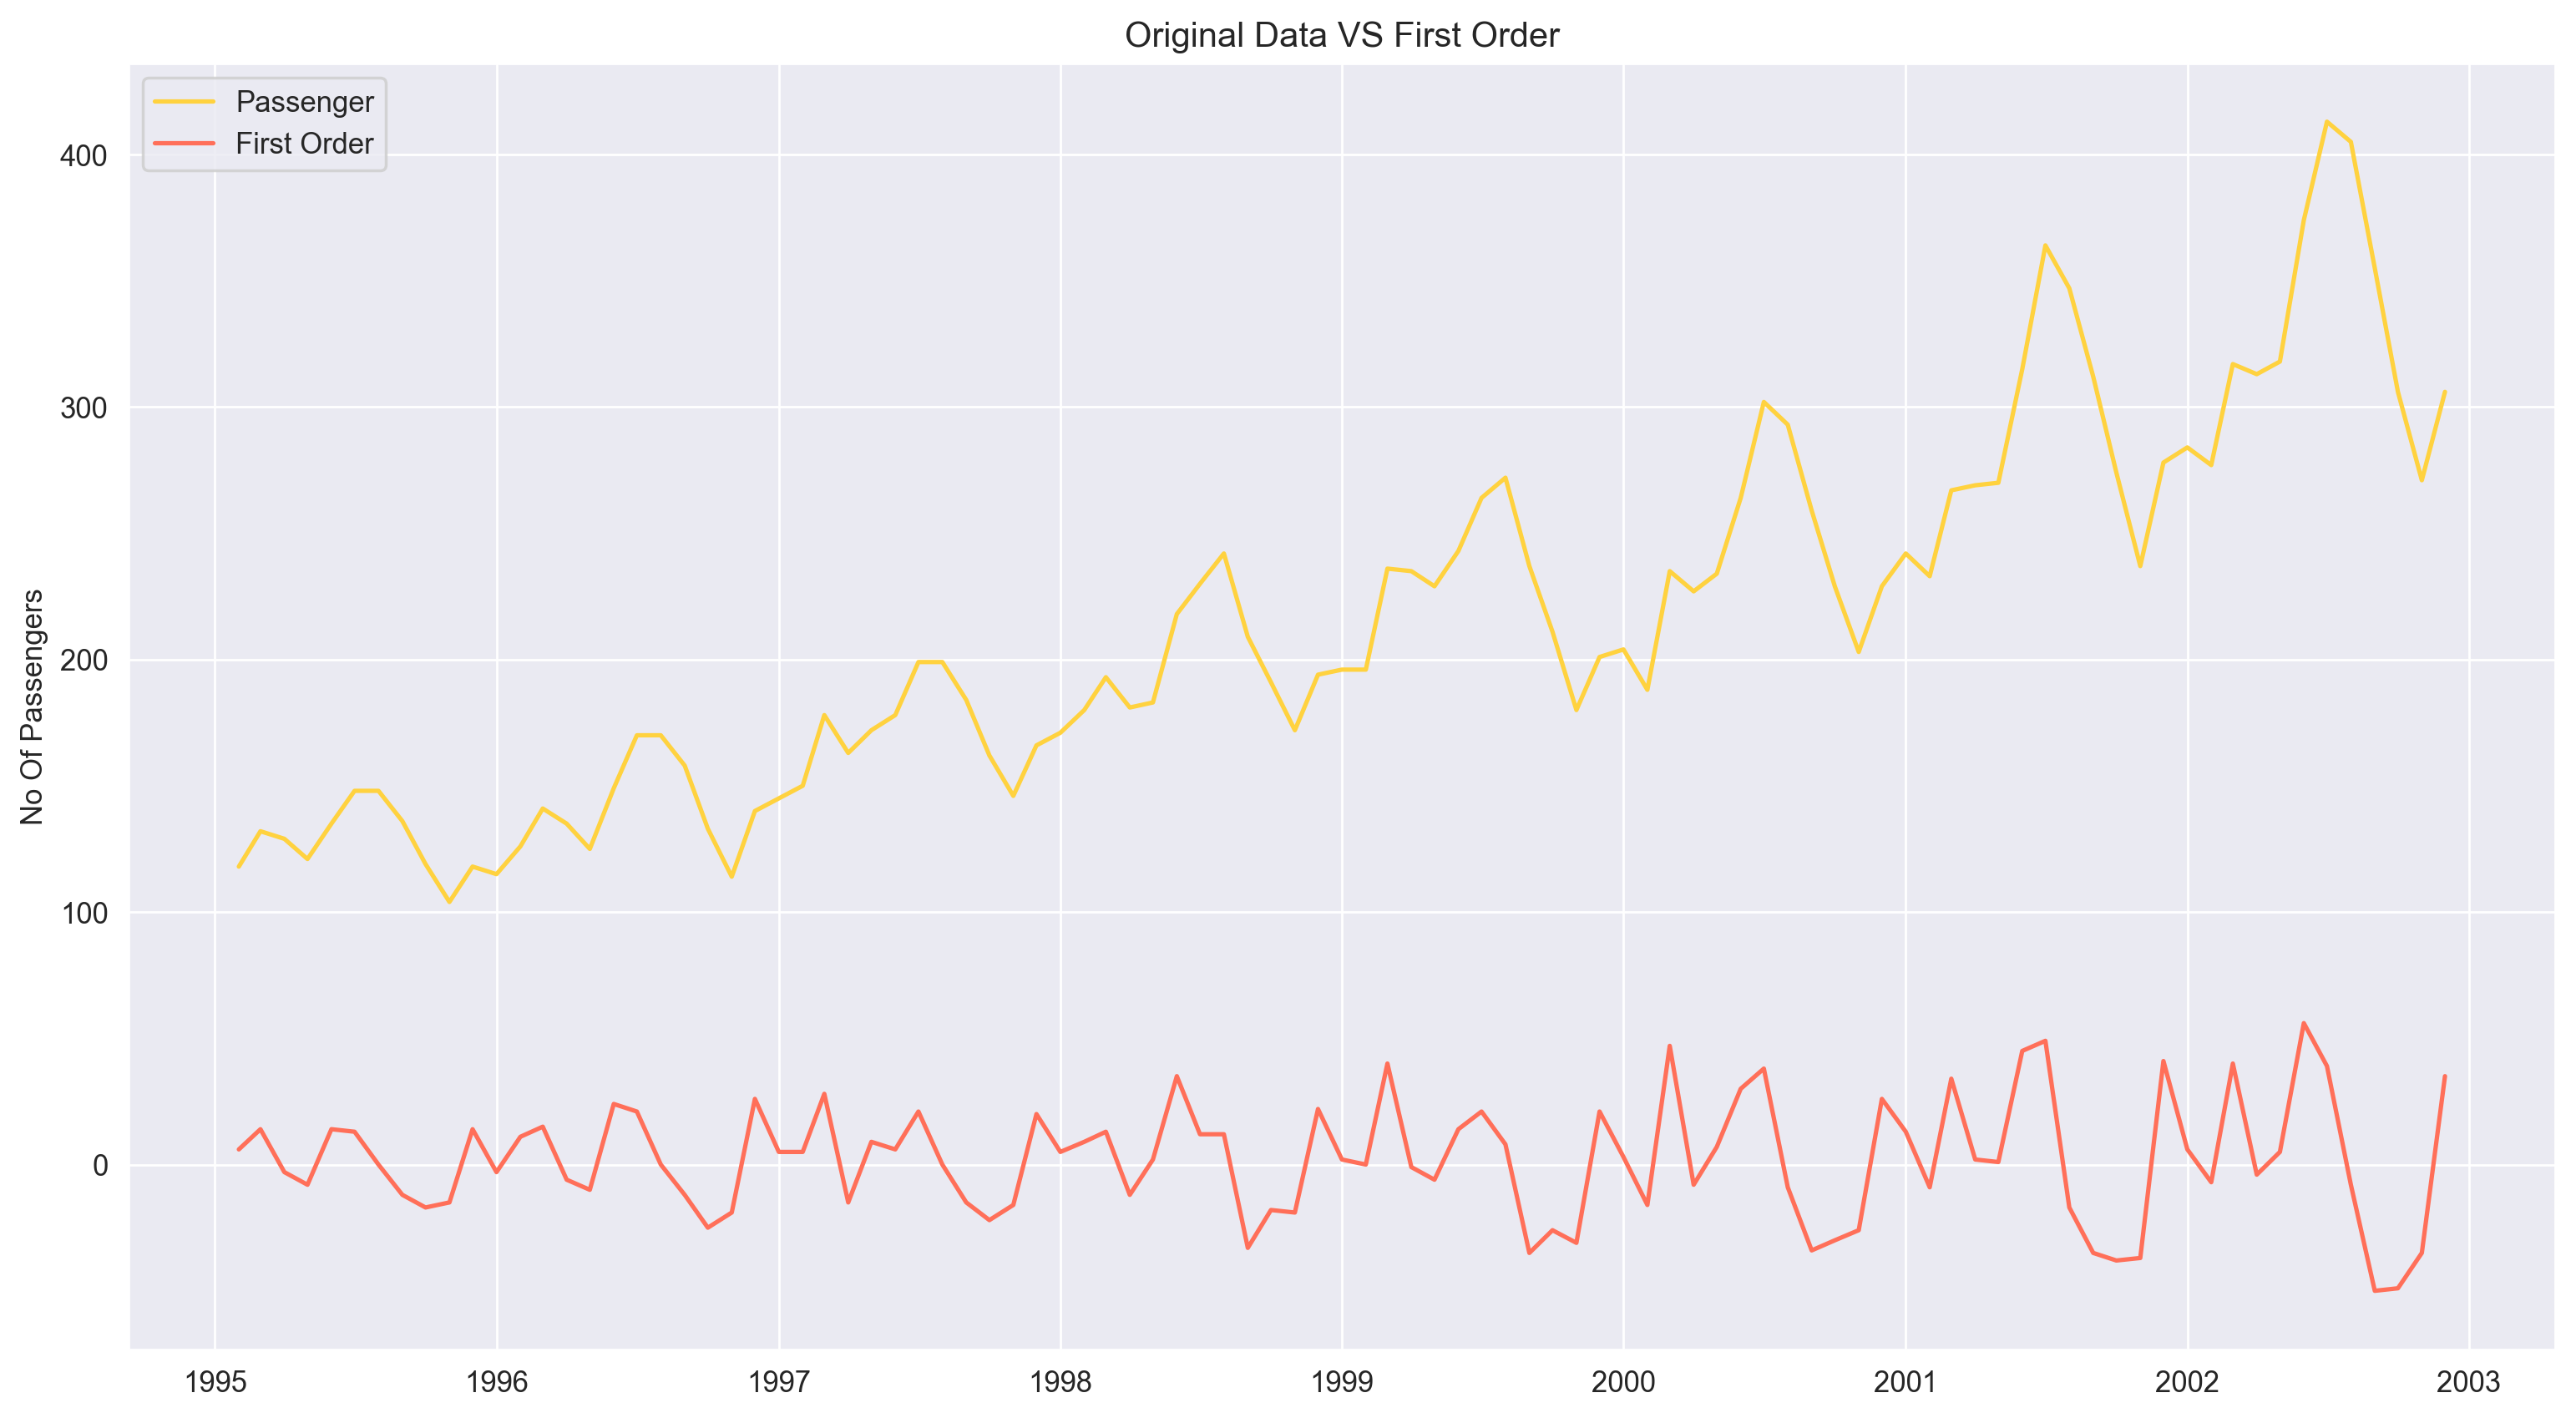

In [32]:
plt.title('Original Data VS First Order')
plt.ylabel('No Of Passengers')
plt.plot(fo['Passengers'], color = '#ffd23f', label = 'Passenger')
plt.plot(fo['First-Order'], color = '#ff6f59', label = 'First Order')
plt.legend()